In [46]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [47]:
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data, color, io, img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square

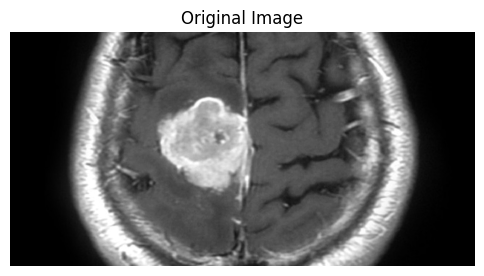

In [73]:
image = io.imread('data_brain.jpeg') 
gray_image_3ch = np.stack((image,)*3, axis=-1)
gray_image = color.rgb2gray(gray_image_3ch)

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

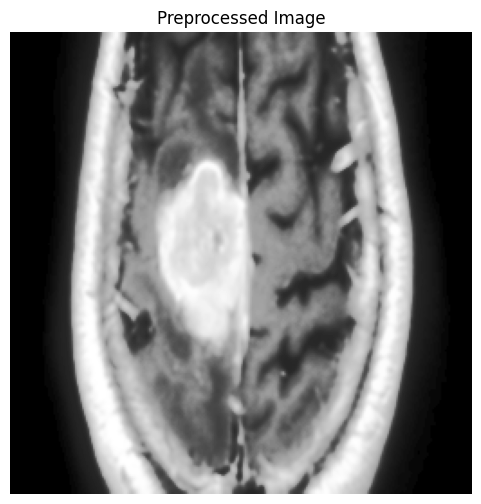

In [74]:
resized_image = cv2.resize(gray_image, (256, 256))
denoised_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
 
denoised_image_8u = img_as_ubyte(denoised_image)
 # Convert to single channel if necessary
if len(denoised_image_8u.shape) > 2:  # Check if it's multi-channel
    denoised_image_8u = cv2.cvtColor(denoised_image_8u, cv2.COLOR_BGR2GRAY)
 
contrast_image = cv2.equalizeHist(denoised_image_8u)
plt.figure(figsize=(6, 6))
plt.imshow(contrast_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

C:\Users\DSL-189\AppData\Local\Temp\ipykernel_12228\1215573213.py:2: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  binary_image = closing(contrast_image>thresh, square(3))


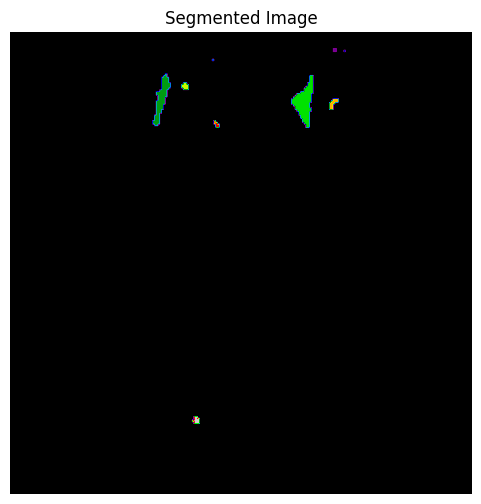

In [76]:
thresh = threshold_otsu(contrast_image)
binary_image = closing(contrast_image>thresh, square(3))
cleared = clear_border(binary_image)
label_image = label(cleared)
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='nipy_spectral')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

Region 4: Area=112.0, Perimeter=64.62741699796952
Region 5: Area=165.0, Perimeter=65.87005768508881


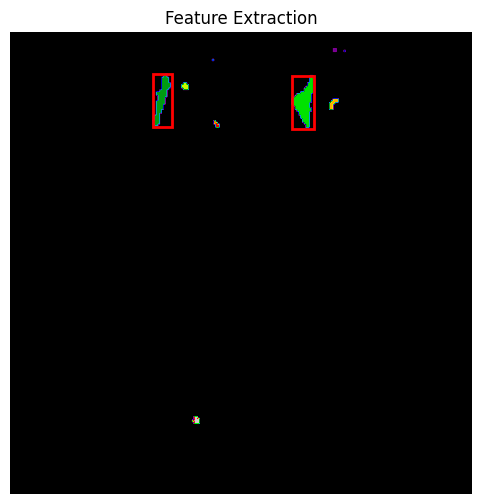

In [77]:
regions = regionprops(label_image)
for region in regions:
    if region.area >= 100:
        print(f"Region {region.label}: Area={region.area}, Perimeter={region.perimeter}")
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='nipy_spectral')

for region in regions:
    if region.area >= 100:
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
plt.title('Feature Extraction')
plt.axis('off')
plt.show()

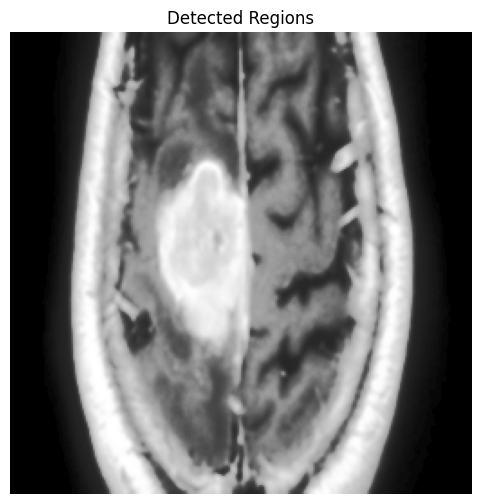

In [78]:
for region in regions:
    if region.area > 200:
        print(f"Detected Region {region.label}: Area={region.area}, Perimeter={region.perimeter}")
        minr, minc, maxr, maxc = region.bbox
        cv2.rectangle(contrast_image, (minc, minr), (maxc, maxr), (255, 0, 0), 2)
plt.figure(figsize=(6, 6))
plt.imshow(contrast_image, cmap='gray')
plt.title('Detected Regions')
plt.axis('off')
plt.show()